## Data Set 1: Power Plant Energy Output

***
### Introduction:
***

The data set examined here has 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), in which the power plant was set to work with full load. 

**Research Question:**

The main purpose of this analysis is to view the relationships each independent variable has on the energy output of the plant.

**Variables:**

The independent variables are:
* Ambient Temperature(T)
* Ambient Pressure (AP)
* Relative Humidity (RH)  
* Exhaust Vacuum (V)

The dependent variable will be the net hourly electrical energy output of the plant.

**Procedures:**

The analysis will follow these main steps:
- **Step 1**: Load data
- **Step 2**: Perform Exploratory Data Analysis
- **Step 3**: Conclusion

>Our EDA is broken down into these steps:
- Understand variables
- Clean dataset
- Analyze relationships between variables

***


In [ ]:
# Importing required libraries.

import pandas as pd
import numpy as np

import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

***
### Step 1: Load data into the data frame from GitHub

`.head()` returns the first 5 rows of the dataset. 

`.tail()` returns the last 5 rows of the dataset.

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day1/Day1_Data.csv")

# To display the top 5 rows
data.head()

,T,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
# To display the bottom 5 rows
data.tail() 

,T,V,AP,RH,EP
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


***
### Step 2: Exploratory Data Analysis

In this case, the procedures of Exploratory Data Analysis consist of:
1. Description of data
2. Check the data types
3. Check the missing or null values
4. Detect and remove Outliers
5. Check distribution
6. Analyze relationships between variables


#### 1. Description of data:
`.shape` returns the number of rows by the number of columns for the dataset. My output was (9568, 5), meaning the dataset has 9568 rows and 5 columns.

`.columns` returns the name of all of the columns in the dataset.

`.describe()` summarizes the count, mean, standard deviation, min, and max for numeric variables. 

In [ ]:
#dataset size:
data.shape

(9568, 5)

In [ ]:
#displaying column names:
data.columns

Index(['T', 'V', 'AP', 'RH', 'EP'], dtype='object')

In [ ]:
#statistical summary of numeric values
data.describe()

,T,V,AP,RH,EP
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


### 2. Check the data types

In [ ]:
#checking data types
data.dtypes

T     float64
V     float64
AP    float64
RH    float64
EP    float64
dtype: object

In this case, the data is already in integer format

### 3. Checking for empty or null data

In [ ]:
#finding any null values
print(data.isnull().sum())

T     0
V     0
AP    0
RH    0
EP    0
dtype: int64


We find that there are no null or empty values in this data set

### 4. Detecting and removing Outliers

A box plot will be used here to detect for outliers. Outliers in a box plot will be shown as a point, while the other data will be grouped together in boxes. Outliers can increase variability in our data, which can distort our analysis and invalidate assumptions we make from it.

There will be 4 box plots for each independent variables tested below:
* Ambient Temperature(T)
* Ambient Pressure (AP)
* Relative Humidity (RH)  
* Exhaust Vacuum (V)

And 1 box plot for the electrical energy output(EP)

Text(0.5, 1.0, 'Box Plot of Net hourly electrical energy output')

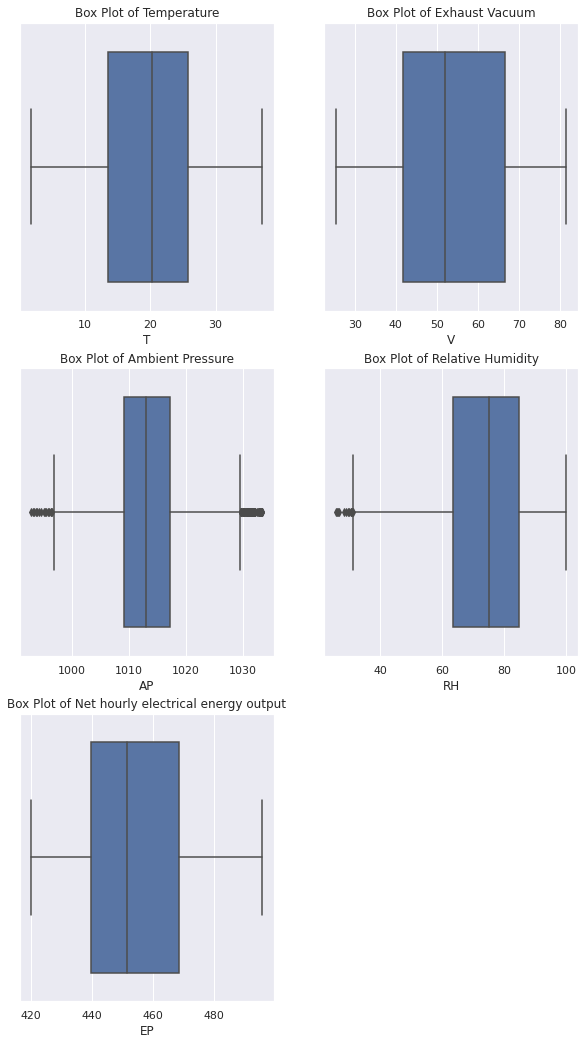

In [ ]:
plt.figure(figsize=(10,18))

# Boxplot of Temperature
plt.subplot(321)
sns.boxplot(x=data['T'])
plt.title('Box Plot of Temperature')

# Boxplot of Exhaust Vacuum 
plt.subplot(322)
sns.boxplot(x=data['V'])
plt.title('Box Plot of Exhaust Vacuum')

# Boxplot of Ambient Pressure 
plt.subplot(323)
sns.boxplot(x=data['AP'])
plt.title('Box Plot of Ambient Pressure')

# Boxplot of Relative Humidity 
plt.subplot(324)
sns.boxplot(x=data['RH'])
plt.title('Box Plot of Relative Humidity')

# Boxplot of Net hourly electrical energy output 
plt.subplot(325)
sns.boxplot(x=data['EP'])
plt.title('Box Plot of Net hourly electrical energy output')

Notice that there are some outliers for Ambient Pressure(AP) and Relative Humidity(RH)

We use IQR to identify and remove outliers.



In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

T     12.2100
V     24.8000
AP     8.1600
RH    21.5025
EP    28.6800
dtype: float64


In [ ]:
dataAfterIQR = data[~((data < (Q1 - 1.5 * IQR)) | (data > Q3 + 1.5 * IQR)).any(axis=1)]
dataAfterIQR.shape

(9468, 5)

In [ ]:
dataAfterIQR.describe()

,T,V,AP,RH,EP
count,9468.000000,9468.00000,9468.000000,9468.000000,9468.000000
mean,19.719883,54.41369,1013.148802,73.322083,454.209298
std,7.427311,12.70141,5.704623,14.551203,17.029285
min,1.810000,25.36000,996.870000,31.150000,420.260000
25%,13.577500,41.74000,1009.090000,63.285000,439.697500
50%,20.500000,52.72000,1012.900000,74.980000,451.210000
75%,25.760000,66.54000,1017.170000,84.840000,468.190000
max,37.110000,81.56000,1029.410000,100.160000,495.760000


After the IQR, 100 rows were considered outliers and removed.

Before removing outliers, the range of AP was 992.89 - 1033.3. Now the range is 996.87 - 1029.42.

For RH, the min was changed from 25.56 to 31.15 while the max remained the same.

### 5. Checking distribution - Histogram

We will check whether the data is normally distributed or skewed ( to the left or right).

Below are histograms of Temperature, Exhaust Vacuum, Ambient Pressure, Relative Humidity, and Net hourly electrical energy output of the plant(output).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc47dc9d470>,
      dtype=object)

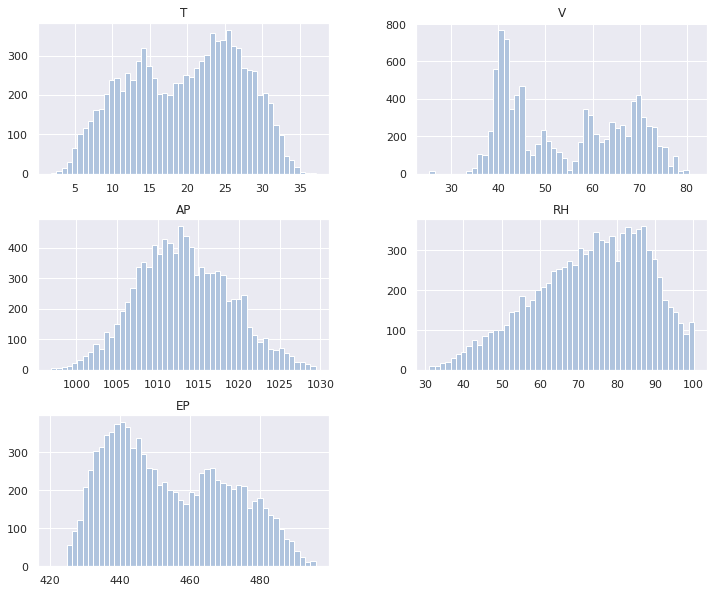

In [ ]:
dataAfterIQR.hist(bins=50, color='lightsteelblue', figsize=(12,10))

We can see that:
* Ambient Pressure(AP) has a normal distribution.
* Relative Humidity(RH) has a left-skewed distribution. The median is larger than the mean.
* EP of the plant has a right-skewed distribution. The mean is larger than the median. 
* Temperature and Exhaust Vacuum have relatively normal distributions.

### 6. Analyzing relationships between variables using `sns.heatmap()` and `sns.regplot`

#### a. Correlation Matrix - heat map

Correlation describes the relationship between two variables. A correlation matrix is a table that shows correlation coefficients between variables. Using heat maps allows us insight into relationships we may want to further explore.

Text(0.5, 1.0, 'Figure 6a: Correlations')

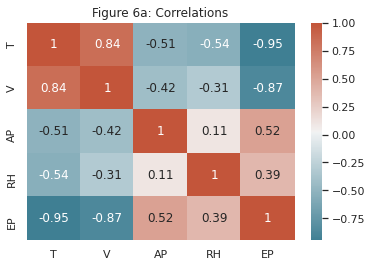

In [ ]:
# calculate correlation matrix
corr = dataAfterIQR.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Figure 6a: Correlations')

A few observations:
* Both temperature(T) and exhaust vacuum(V) seem to have a heavy negative correlation with EP.
* Both ambient pressure(AP) and relative humidity(RH) seem to have a weaker, positive correlation with EP.

#### b. Plots of Electrical Energy Output of the Plant vs. Other Variables in the Dataset

We use `sns.regplot` to display relationships between the independent variables and the dependent variable.

We use seaborn to calculate and plot a linear regression model fit along a 95% confidence interval band.

Text(0.5, 1.0, 'Figure 7.4: Relative Humidity vs. output')

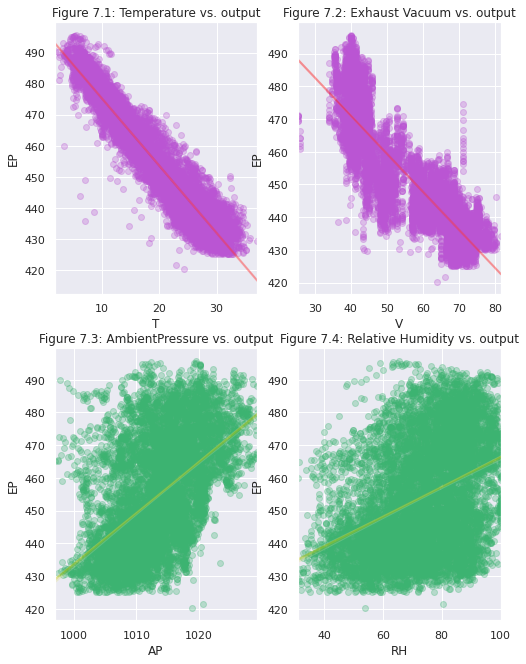

In [ ]:
plt.figure(figsize=(8,11))

# Plot a relationship between two variables
plt.subplot(221)
sns.regplot(x="T", y="EP",data=dataAfterIQR, scatter_kws = {'color': 'mediumorchid', 'alpha': 0.3}, line_kws = {'color': 'red','alpha': 0.3})
plt.title('Figure 7.1: Temperature vs. output')

plt.subplot(222)
sns.regplot(x="V", y="EP",data=dataAfterIQR, scatter_kws = {'color': 'mediumorchid', 'alpha': 0.3}, line_kws = {'color': 'red','alpha': 0.3})
plt.title('Figure 7.2: Exhaust Vacuum vs. output')

plt.subplot(223)
sns.regplot(x="AP", y="EP",data=dataAfterIQR, scatter_kws = {'color': 'mediumseagreen', 'alpha': 0.3}, line_kws = {'color': '#CCCC00','alpha': 0.3})
plt.title('Figure 7.3: AmbientPressure vs. output')

plt.subplot(224)
sns.regplot(x="RH", y="EP",data=dataAfterIQR, scatter_kws = {'color': 'mediumseagreen', 'alpha': 0.3}, line_kws = {'color': '#CCCC00','alpha': 0.3})
plt.title('Figure 7.4: Relative Humidity vs. output')


***
### Conclusion

Based on the results from our regplot and heatmap, there are a few avenues to continue exploring. From our heatmap, we can see that both Temperature(T) and Exhaust Vacuum (V) are both negatively correlated with the plant's electrical energy output(EP), whereas Ambient Pressure(AP) and Relative Humidity(RH) are both positively correlated with EP. For example, as the temperature goes up, the energy output of the plant goes down. As the ambient pressure goes up, the energy output of the plant also goes up. Note that Temperature and Exhaust Vacuum variables seem to have a stronger correlation with EP. These are just the preliminary observations with the charts used. Additional models(i.e. Linear Regression) should be analyzed to fully grasp the relationships between every variable. 

<br>

A few avenues to further explore using more models:
* To what extent does the temperature affect the energy output of the plant? 
* Is temperature the most important variable to use when predicting the energy output of the plant? If so, by how much?